Summary of my solutions are below. Codes, graphs and more detailed information are also available in following parts

## Question-1

Transformation seems appropriate due to huge difference between prior and recent period values. This issue prevent us to properly justify earlier changes.
Also box-cox transformation factor is 0.0023 and this shows us the transformation is necessary.
Prior period changes are easy to observe after transformation. 

## Question-2

Residuals look like they are not correlated and there should be more insight in time series to dig in.
    1.Mean of residuals looks like around 0. And variance is constant.
    2.The distribution is not perfectly normal, but has a similar distribution.
    3.Residuals have low autocorrelation according to ACF, values are inside the upper and lower bounds.
    
So; it is possible to conclude that residuals looks like white noise.

About accuracy; we have found RMSE as 16.733 and MAPE as 3.23%.
Average Beer_Prod is 415 Megalitres so RMSE and MAPE values indicates that naive method is very accurate. 
But, we need to have a reference point -like another forecast- to decide on accuracy performance.

## Question-3

#### 3A)

Both seasonal fluctiations and an increasing trend is observable. 
Sales of product A increases in summer times and there is an increasing trend in sales in last 6 years period.

#### 3B-3C)

As seen in below graphs, there is a significant upward trend line and seasonal trends also exist.
So decomposition analysis supports our earlier interpretations 

#### 3E)

The outlier is near the end of our dataset and it doesn't really affects the rest of the dispersion but recent periods. we observe 1 pick point.

#### 3F)

The data with near-end outlier shows almost the same behaviour with the original time series except last green pick. 
However, the one with middle outlier shows different adjustment mistakes all over the time series. 
So, an early period data disturbance affects seasonal adjustments more than recent ones.

## Question-4

#### 4C)

We are evaluating day 14 forecasts (date 2019-12-20). While doing this evaluation, the difference between lower and upper bounds are important.
With respect to evaluation, interval size of one-step ahead is narrower than two-step ahead. So, we can conclude that one-step models better interval size than two-step for this case.

# Import Libs

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook') 
sns.set_style('ticks')

#Optional, wider screen display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## Question-1

Transformation seems appropriate due to huge difference between prior and recent period values. This issue prevent us to properly justify earlier changes.
Also box-cox transformation factor is 0.0023 and this shows us the transformation is necessary.
Prior period changes are easy to observe after transformation. 

In [2]:
#Read data
dole = pd.read_csv('dole.csv', header = 0)
#Adjustments on index, date and column headings
dole.index=pd.date_range(start='31/Jan/1956', end='31/jul/1992', freq = 'M' ).to_period()
dole.rename(columns = {'Unnamed: 0': 'Week_No', 'x' : 'N_of_People'},inplace = True)
dole.head()

,Week_No,N_of_People
1956-01,1,4742
1956-02,2,6128
1956-03,3,6494
1956-04,4,5379
1956-05,5,6011


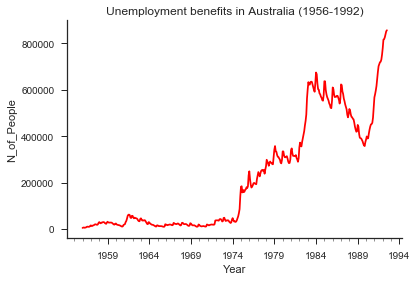

In [3]:
#Graph of unemployment benefits with respect to months between 1956-1992 in Australia.
fig, ax = plt.subplots()
dole['N_of_People'].plot(color = 'red')
ax.set_xlabel('Year')
ax.set_ylabel('N_of_People')
ax.set_title('Unemployment benefits in Australia (1956-1992)')
sns.despine()
plt.show()

Box-Cox Lambda: 0.002320383211596283


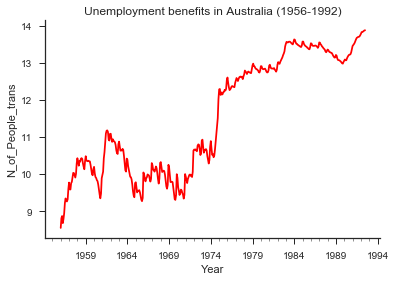

In [4]:
#Box-Cox transformation
from scipy import stats
k = stats.boxcox(dole['N_of_People'])
print('Box-Cox Lambda: '+ str(k[1]))
dole['N_of_People_2'] = k[0]

#Graph of unemployment benefits with respect to months between 1956-1992 in Australia after Box-Cox Transformation.
fig, ax = plt.subplots()
dole['N_of_People_2'].plot(color = 'red')
ax.set_xlabel('Year')
ax.set_ylabel('N_of_People_trans')
ax.set_title('Unemployment benefits in Australia (1956-1992)')
sns.despine()
plt.show()

## Question-2

In [5]:
#Read data
ausbeer = pd.read_csv('ausbeer.csv')

In [6]:
#Read data
ausbeer = pd.read_csv('ausbeer.csv')

#Set index as quarterly periods
ausbeer.index = pd.date_range(start='1956-Q1', end='2010-Q3', freq = 'Q' ).to_period()

#Rename headers
ausbeer.rename(columns = {'Unnamed: 0': 'Quarter_No', 'x' : 'Beer_Prod(Megalitres)'},inplace = True)

#Seasonal Naive Predictions
ausbeer['NaivePred'] = ausbeer['Beer_Prod(Megalitres)'].shift(periods = 4)

#Residuals
ausbeer['Residuals'] = ausbeer['Beer_Prod(Megalitres)'] - ausbeer['NaivePred']


ausbeer = ausbeer[ausbeer.index >= '1992Q1']
ausbeer.head()

,Quarter_No,Beer_Prod(Megalitres),NaivePred,Residuals
1992Q1,145,443,464.0,-21.0
1992Q2,146,410,424.0,-14.0
1992Q3,147,420,436.0,-16.0
1992Q4,148,532,574.0,-42.0
1993Q1,149,433,443.0,-10.0


##### Residual Diognostics

In [7]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

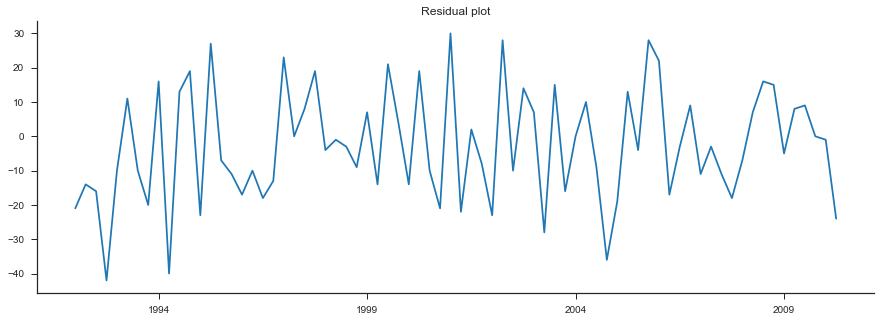

In [8]:
fig, ax= plt.subplots(figsize=(15,5))
ausbeer['Residuals'].plot()
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

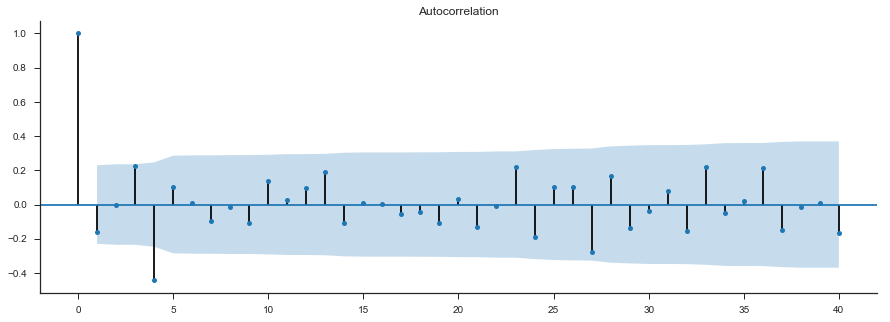

In [9]:
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.tsa.plot_acf(ausbeer['Residuals'][1:], lags=40, ax=ax)
sns.despine()
plt.show()

D:\Users\akavdir\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


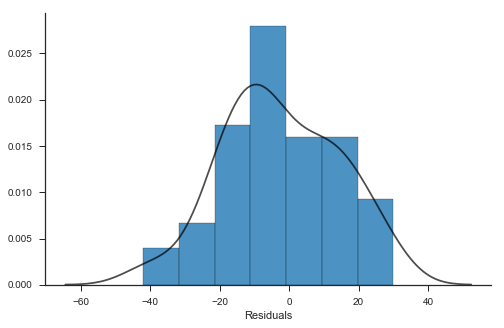

In [10]:
def hist(series):
    fig, ax= plt.subplots(figsize=(8,5))
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.8, 'edgecolor':'black'},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    sns.despine()
    return fig, ax

hist(ausbeer['Residuals'][1:])
plt.show()

#### Accuracy

In [11]:
#MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [12]:
from statlearning import rmse_jack

table = pd.DataFrame(0.0, index=ausbeer.columns[2:3], columns=['RMSE','SE', 'MAPE'])
table.iloc[0,0], table.iloc[0,1] = rmse_jack(ausbeer.iloc[1:,1], ausbeer.iloc[1:,2])
table.iloc[0,2] = mean_absolute_percentage_error(ausbeer.iloc[1:,1], ausbeer.iloc[1:,2])
table.round(3)

,RMSE,SE,MAPE
NaivePred,16.733,1.226,3.238


## Question-3

In [13]:
#Read data
plastics = pd.read_csv('plastics.csv')

#Set index as quarterly periods
plastics.index = pd.date_range(start='2015-01', end='2020-01', freq = 'M' ).to_period()

#Rename headers
plastics.rename(columns = {'Unnamed: 0': 'Month_No', 'x' : 'Sales(000)'},inplace = True)

#### 3A)

Both seasonal fluctiations and an increasing trend is observable. 
Sales of product A increases in summer times and there is an increasing trend in sales in last 6 years period.

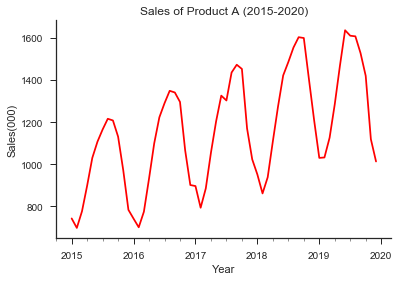

In [14]:
#Graph of sales of Product A
fig, ax = plt.subplots()
plastics['Sales(000)'].plot(color = 'red')
ax.set_xlabel('Year')
ax.set_ylabel('Sales(000)')
ax.set_title('Sales of Product A (2015-2020)')
sns.despine()
plt.show()

#### 3B-3C)

As seen in below graphs, there is a significant upward trend line and seasonal trends also exist.
So decomposition analysis supports our earlier interpretations 

In [15]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
def plotseasonal(res, axes ):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

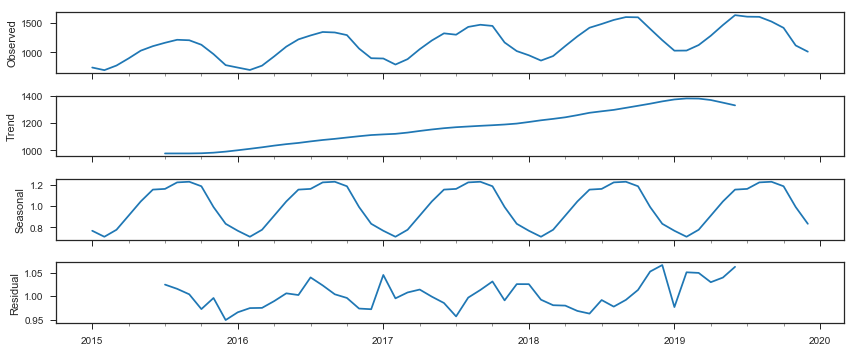

In [17]:
decomposition =  seasonal_decompose(plastics['Sales(000)'], model='mult', freq = 12)

fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(12,5))

plotseasonal(decomposition, axes)

plt.tight_layout()
plt.show()

#### 3D)

In [18]:
seasadj=np.divide(decomposition.observed,decomposition.seasonal)

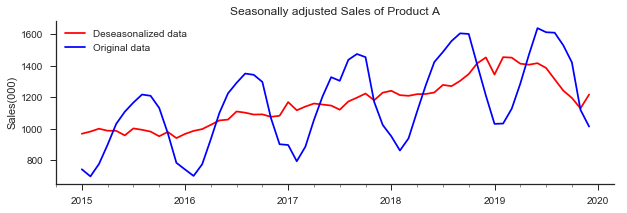

In [19]:
fig, ax= plt.subplots(figsize=(10,3))
seasadj.plot(color='red',label='Deseasonalized data')
plastics['Sales(000)'].plot(color='blue',label='Original data')
plt.legend(loc='best')
ax.set_xlabel('')
ax.set_ylabel('Sales(000)')
ax.set_title('Seasonally adjusted Sales of Product A')
#ax.set_xticks([], minor=True) # I prefer to remove the minor ticks for a cleaner plot
sns.despine()
plt.show()

#### 3E)

The outlier is near the end of our dataset and it doesn't really affects the rest of the dispersion but recent periods. we observe 1 pick point.

In [20]:
y_outlier1 = plastics['Sales(000)'].copy()
y_outlier1['2019-09'] = y_outlier1['2019-09'] + 500
decomposition =  seasonal_decompose(y_outlier1, model='mult', freq = 12)
seasadj2=np.divide(decomposition.observed,decomposition.seasonal)

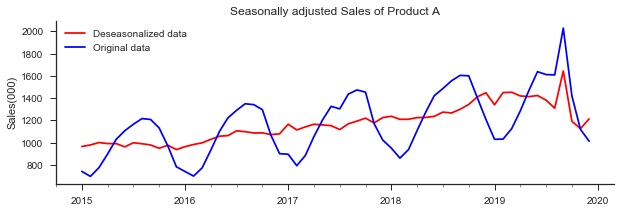

In [21]:
fig, ax= plt.subplots(figsize=(10,3))
seasadj2.plot(color='red',label='Deseasonalized data')
y_outlier1.plot(color='blue',label='Original data')
plt.legend(loc='best')
ax.set_xlabel('')
ax.set_ylabel('Sales(000)')
ax.set_title('Seasonally adjusted Sales of Product A')
#ax.set_xticks([], minor=True) # I prefer to remove the minor ticks for a cleaner plot
sns.despine()
plt.show()

#### 3F)

The data with near-end outlier shows almost the same behaviour with the original time series except last green pick. 
However, the one with middle outlier shows different adjustment mistakes all over the time series. 
So, an early period data disturbance affects seasonal adjustments more than recent ones.

In [22]:
y_outlier2 = plastics['Sales(000)'].copy()
y_outlier2['2016-09'] = y_outlier2['2016-09'] + 500
decomposition =  seasonal_decompose(y_outlier2, model='mult', freq = 12)
seasadj3=np.divide(decomposition.observed,decomposition.seasonal)

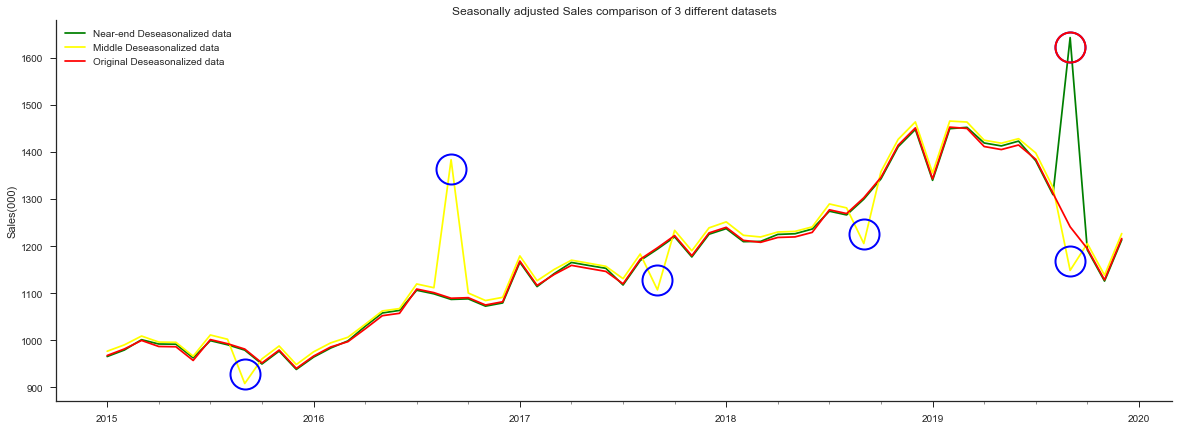

In [23]:
fig, ax= plt.subplots(figsize=(20,7))
#plastics['Sales(000)'].plot(color='blue',label='Original data')

seasadj2.plot(color='green',label='Near-end Deseasonalized data')
seasadj3.plot(color='yellow',label='Middle Deseasonalized data')
seasadj.plot(color='red',label='Original Deseasonalized data')
plt.legend(loc='best')
ax.set_xlabel('')
ax.set_ylabel('Sales(000)')
ax.set_title('Seasonally adjusted Sales comparison of 3 different datasets')
#ax.set_xticks([], minor=True) # I prefer to remove the minor ticks for a cleaner plot
circle_rad = 15  # This is the radius, in points
ax.plot([seasadj3.index[8], seasadj3.index[20],seasadj3.index[32],seasadj3.index[44], seasadj3.index[56], seasadj3.index[56] ],
        [seasadj3['2015-09']+20, seasadj3['2016-09']-20,seasadj3['2017-09']+20,seasadj3['2018-09']+20,seasadj3['2019-09']+20,seasadj2['2019-09']-20],
        'o', ms=circle_rad * 2, color = 'blue', mfc='none', mew=2)
ax.plot([seasadj3.index[56]],
        [seasadj2['2019-09']-20],
        'o', ms=circle_rad * 2, color = 'red', mfc='none', mew=2)

sns.despine()
plt.show()

## Question-4

#### 4A)

In [24]:
#Read data
ING = pd.read_csv('ING_stock.csv')
#Set index as date
ING.set_index(pd.to_datetime(ING['Date']),inplace = True)
ING.drop('Date', axis = 1, inplace = True)

In [25]:
h = 14
from datetime import timedelta
test=pd.period_range(start=ING.index[-1]+timedelta(1), periods=h, freq='D')

pred=pd.Series(list(np.repeat(ING.iloc[-1], h)), index=test) # the forecast repeats the last observed values h times

#For bootstraping, we use standard deviation of prior dataset.
resid=ING-ING.shift(1) # the shift lags the series by one period
sigma = resid.std()
round(sigma,3)

#Calculate PIs for the next 14 forecasts with %90 prediction interval.
intv = pd.concat([pred-stats.norm.ppf(0.95)*sigma[0]*np.sqrt(np.arange(1,h+1)),
                   pred+stats.norm.ppf(0.95)*sigma[0]*np.sqrt(np.arange(1,h+1))], axis=1)
intv.round(3)

,0,1
2019-12-07,11.266,11.874
2019-12-08,11.140,12.000
2019-12-09,11.043,12.097
2019-12-10,10.962,12.178
2019-12-11,10.890,12.250
2019-12-12,10.825,12.315
2019-12-13,10.765,12.375
2019-12-14,10.709,12.431
2019-12-15,10.657,12.483
2019-12-16,10.608,12.532


#### 4B)

In [26]:
h = 7
from datetime import timedelta
test=pd.period_range(start=ING.index[-1]+timedelta(2), periods=h, freq='2D')

pred = pd.Series(list(np.repeat(ING.iloc[-2], h)), index=test) # the forecast repeats the last observed values h times

#For bootstraping, we use standard deviation of prior dataset.
resid=ING-ING.shift(2) # the shift lags the series by one period
sigma = resid.std()
print(round(sigma,3))

#Calculate PIs for the next 7 forecasts with %90 prediction interval.
intv2 = pd.concat([pred-stats.norm.ppf(0.95)*sigma[0]*np.sqrt(np.arange(1,h+1)),
                   pred+stats.norm.ppf(0.95)*sigma[0]*np.sqrt(np.arange(1,h+1))], axis=1)
intv2.round(3)

Close    0.279
dtype: float64


,0,1
2019-12-08,11.031,11.949
2019-12-10,10.841,12.139
2019-12-12,10.695,12.285
2019-12-14,10.572,12.408
2019-12-16,10.463,12.517
2019-12-18,10.365,12.615
2019-12-20,10.275,12.705


#### 4C)

We are evaluating day 14 forecasts (date 2019-12-20). While doing this evaluation, the difference between lower and upper bounds are important.
With respect to evaluation, interval size of one-step ahead is narrower than two-step ahead. So, we can conclude that one-step models better interval size than two-step for this case.

In [36]:
import warnings
warnings.filterwarnings("ignore")

#The size of intervals
day14_pred1 = intv[-1:]
day14_pred1['Interval Size'] = intv.loc[:,1] - intv.loc[:,0]
day14_pred2 = intv2[-1:]
day14_pred2['Interval Size'] = intv2.loc[:,1] - intv2.loc[:,0]

print('One-step ahead:')
print(day14_pred1)
print('')
print('Two-step ahead:')
print(day14_pred2)

One-step ahead:
                    0          1  Interval Size
2019-12-20  10.431638  12.708362       2.276723

Two-step ahead:
                    0          1  Interval Size
2019-12-20  10.275131  12.704869       2.429738
